<img src="images/body-part-regression-title.png" width=1000/>

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
import nibabel as nib
import json, sys

from ipywidgets import widgets, interactive
from bpreg.scripts.bpreg_inference import bpreg_inference
from bpreg.preprocessing.nifti2npy import load_nifti_volume, Nifti2Npy
from bpreg.settings.settings import * 
from tqdm import tqdm 

sys.path.append("../")
from utils import * 

# TODO 


1. Provide Nifti Data on Zenodo 
    - Subset of CT scans from the COVID-19-AR dataset in the nifti file format for the body part regression tutorial 
2. Show example json file in presentation 
3. Add Thank You image
- Happy Smilie for solving the problem 
- Stating Problem more explicit in Quote bigger font ... 
4. Adapt Style of Notebook 
5. Add Vertebrae of the Spine explanation iamge (?) 
3. Clean up notebook 
- Functions to utils 
4. Test presentation 
- How long is it? 
- Add HTML backup 
5. Prepare Slideshow for sharing



# Analyze chest CT scans in COVID-19 dataset


## Preprocessing Steps: 

To analyze the lungs in new dataset: 
1. Filter corrupted/invalid CT scans 
1. find CT volumes which include lungs
2. Crop volumes, so that only the lungs are visible
---------------------------

Download data from study **COVID-19-AR** from the TCIA
- 195 CT scans 

## TODO: 
    - Show non chest CT scans 
    - Show corrupted CT scans 
    - Show CT scans with more body regions 

# Body Part Recognition with Python 

In [2]:
# define paths 
nifti_path = "COVID-19-AR/nifti_files/"
json_path = "COVID-19-AR/output_files/"
cropped_path = "COVID-19-AR/cropped_nifti_files/"
cropped_json_path = "COVID-19-AR/cropped_output_files/"

## 1. Download Data 
- Download COVID-19 CT dataset from the TCIA: 
https://wiki.cancerimagingarchive.net/pages/viewpage.action?pageId=70226443
- Convert the DICOM files to NIFTI files. I recommend to use the simpleITK package for the conversion. 
--------------------------- 
<img src="images/tcia-screenshot.png" width=1000/>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## 2. Analyze Data 

In [3]:
plot_volumes_interactive(nifti_path) 

interactive(children=(BoundedFloatText(value=39.0, description='File:', max=190.0, step=1.0), Output()), _dom_…

<br> 
<br> 
<br> 
<br> 
<br>
<br>
<br>

--------------------------------------------


<img src="images/problems-with-covid19-dataset.png" width=1000/>
<br> 
<br> 
<br> 
<br> 
<br>
<br>
<br>

## 3. Define preprocessing steps 
1. Remove invalid CT scans 
    - filter CT scans, with wrong axis ordering
    - filter corrupted CT scans, where no human body is visible 
    - filter CT scans with less than 20 slices 
2. Remove CT scans, where the lungs are not fully visible 
3. Crop CT scans to the chest region
<br>
<br>
<br>
<br>


## 4. Use Body Part Regression for Preprocessing
https://github.com/MIC-DKFZ/BodyPartRegression
<img src="images/body-part-regression-explanation.png" width=1000/>
<br> 
<br> 
<br> 
<br> 
<br>
<br>
<br>

## 5. Create body part metadata file for each CT image 
<img src="images/Main-body-part-regression-function.png" width=800/>


In [4]:
# bpreg_inference(nifti_path, json_filepath, plot=True)

<br>
<br>
<br>
<br>
<br>

## 6. Analyze body part meta data files

In [5]:
plot_scores_interactive(json_path, nifti_path)

interactive(children=(BoundedFloatText(value=15.0, description='File:', max=190.0, step=1.0), Output()), _dom_…

In [6]:
df = create_meta_data_table(json_path)

# Filter CT scans with less than 20 slices 
df = df[df.z > 20]

191it [00:00, 639.79it/s]


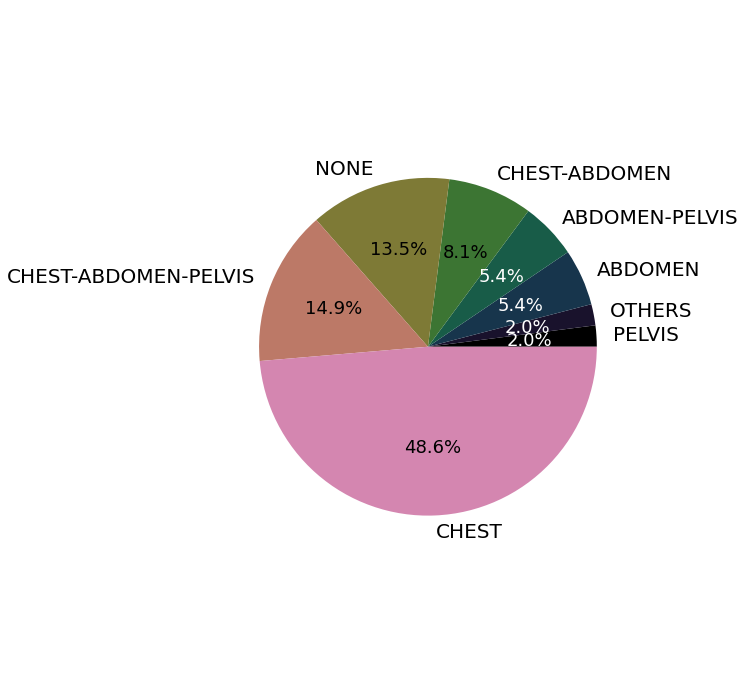

In [7]:
plot_dicomexamined_distribution(df, 
                                others_percentage_upper_bound=0.015)


## 7. Remove invalid CT scans
- Filter CT scans, were the predicted body part is **NONE** 

In [8]:
# Filter corrupted CT scans 
df_cleaned = df[df['BODY PART'] != 'NONE']
print(f"Dataset size after removing {len(df) - len(df_cleaned)} corrupted CT scans: {len(df_cleaned)}") 

Dataset size after removing 20 corrupted CT scans: 128


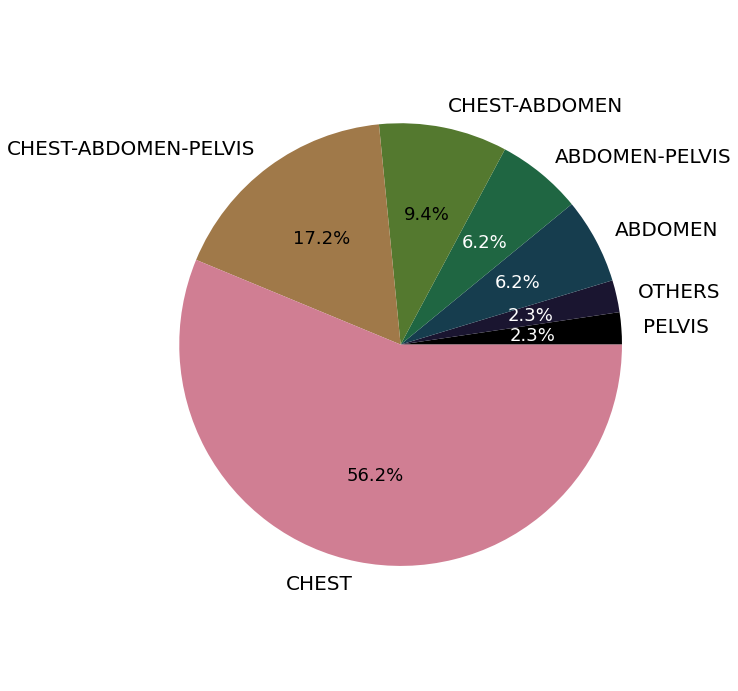

In [9]:
plot_dicomexamined_distribution(df_cleaned, 
                                others_percentage_upper_bound=0.02)


## 8. Filter chest CT scans

In [10]:
# Removing CT scans where the chest is not examined
df_cleaned = df_cleaned[df_cleaned['BODY PART'].str.contains('CHEST')]
print(f"Dataset after removing CT scans, where the CHEST is not visible:  {len(df_cleaned)}") 

Dataset after removing CT scans, where the CHEST is not visible:  109


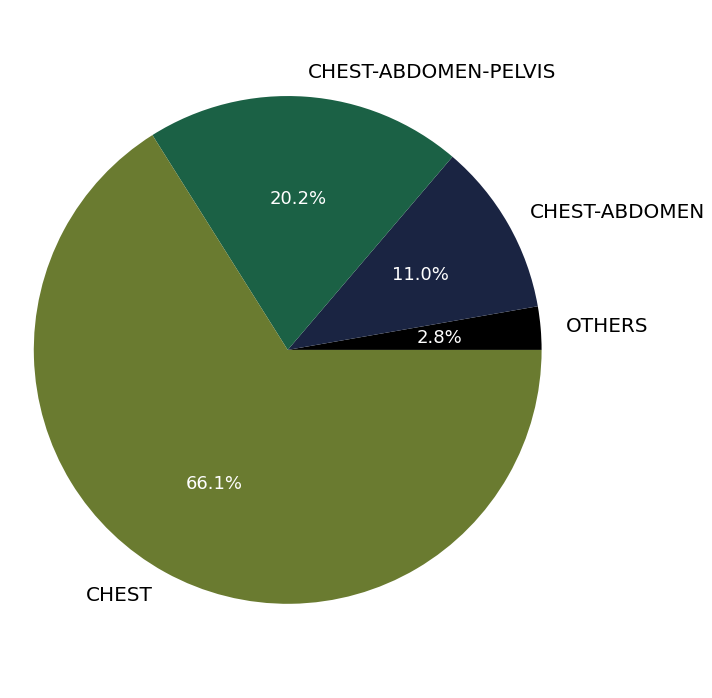

In [11]:
plot_dicomexamined_distribution(df_cleaned, 
                                others_percentage_upper_bound=0.02)

## 9. Crop chest region out of CT scan

<img src="images/landmarks-anatomy-2.png" width=600/>
Adapted from: 
https://www.freepik.com/free-vector/set-human-body-anatomy_10163663.htm

In [12]:
json_filepaths = [json_path + f for f in os.listdir(json_path) if f.endswith(".json")]
x = load_json(json_filepaths[0])
lookuptable = pd.DataFrame(x["look-up table"]).T
start_score = x["look-up table"]["lung_start"]["mean"]
end_score = x["look-up table"]["lung_end"]["mean"]

lookuptable.sort_values(by="mean")[["mean"]]

,mean
pelvis_start,0.000
femur_end,13.616
L5,25.532
pelvis_end,28.824
L4,29.414
L3,33.817
kidney,37.597
L2,37.763
L1,41.478
lung_start,44.143


In [13]:
nifti_filepaths = [nifti_path + f.replace(".json", ".nii.gz") for f in df_cleaned.FILE]

# crop and save ct images to chest region 
# crop_ct_images(nifti_filepaths, json_path,  cropped_path, save=True)

# create body part meta data for cropped images
# bpreg_inference(cropped_path, cropped_json_path, plot=True, gpu_available=False)

## 10. Analyze preprocessed dataset 

109it [00:00, 910.82it/s]


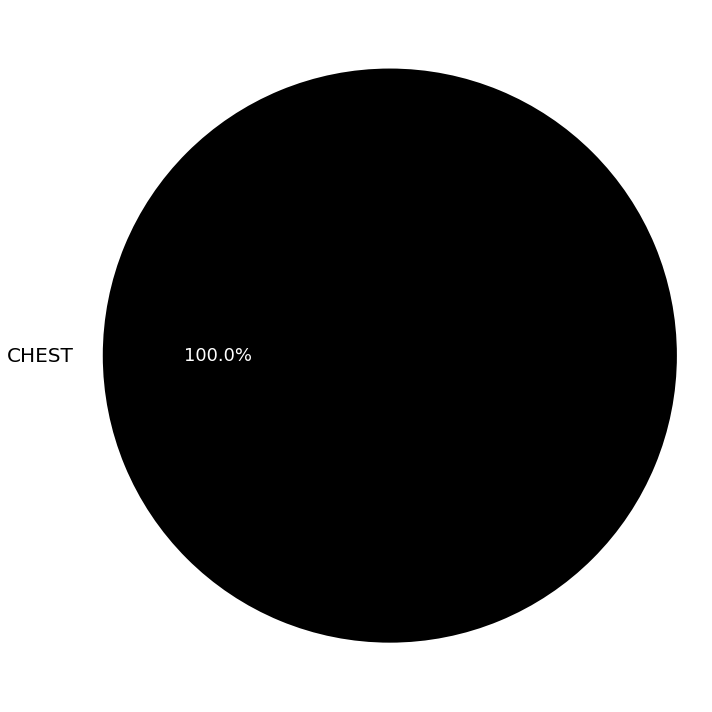

In [16]:
# create meta data table of new CT dataset (cropped)
df_cropped = create_meta_data_table(cropped_json_path)

bodyparts = plot_dicomexamined_distribution(df_cropped)

In [17]:
plot_scores_interactive(cropped_json_path, cropped_path)

interactive(children=(BoundedFloatText(value=15.0, description='File:', max=108.0, step=1.0), Output()), _dom_…